### Подготовка данных к анализу

#### Изучим данные.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # пользователи

In [3]:
hypothesis.info()
pd.options.display.max_colwidth = 150
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
123,3268937183,3722682546,2019-08-22,1450,A
423,4161654914,990904712,2019-08-19,11249,B
14,3859315276,1565034404,2019-08-15,10980,A
185,716439623,1129369369,2019-08-23,1840,A
1043,543733679,4100747010,2019-08-11,1120,B


In [5]:
visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
24,2019-08-25,A,621
8,2019-08-09,A,617
18,2019-08-19,A,502
60,2019-08-30,B,490
26,2019-08-27,A,711


#### Заменим названия столбцов.

In [6]:
# замена названий столбцов
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### Преобразуем данные в нужные типы.

In [7]:
# преобразование данных о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


#### Проверим данные на пропуски.

In [8]:
# проверка пропусков
print(hypothesis.isna().sum())
print(orders.isna().sum())
print(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


В данных отсутствуют пропуски.

#### Проверим данные на явные и неявные дубликаты.

In [9]:
# проверка явных дубликатов
print('Количество явных дубликатов в визитах:', hypothesis.duplicated().sum())
print('Количество явных дубликатов в заказах:', orders.duplicated().sum())
print('Количество явных дубликатов в расходах:', visitors.duplicated().sum())

Количество явных дубликатов в визитах: 0
Количество явных дубликатов в заказах: 0
Количество явных дубликатов в расходах: 0


In [10]:
# проверка неявных дубликатов в столбце с гипотезами
hypothesis['hypothesis'].sort_values(ascending=False).unique()

array(['Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Запустить акцию, дающую скидку на товар в день рождения',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'],
      dtype=object)

В данных отсутствуют явные и неявные дубликаты.

### Приоритизация гипотез
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['ICE']=round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 3)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективная гипотеза по ICE: 8 ('Запустить акцию, дающую скидку на товар в день рождения'). Затем идут гипотезы 0, 7, 6 и т.д.

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективная гипотеза по ICE: 7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'). Затем идут гипотезы 2, 0, 6 и т.д.

#### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Фреймворк ICE (влияние, уверенность, усилия) — один из самых популярных способов приоритизации задач, который рассчитывается по формуле: Влияние * Уверенность в успехе / Объём затраченных на реализацию усилий.  
У этого фреймворка есть модификация RICE (охват, влияние, уверенность, усилия), которая рассчитывается по формуле: Охват аудитории * Влияние * Уверенность в успехе / Объём затраченных на реализацию усилий.

При применении ICE наиболее перспективной гипотезой оказалась гипотеза под номером 8 ('Запустить акцию, дающую скидку на товар в день рождения').  
При применении RICE на первом месте – гипотеза под номером 7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'), так как её параметр Reach (охват пользователей) равен 10, в то время как у других гипотез он меньше. По ICE эта гипотеза находилась на третьем месте.

### Анализ A/B-теста
Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализируем A/B-тест.

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

В А/В тесте пользователи были разделены на две группы: A и B. Так как на одном наборе данных нужно провести несколько тестов, то имеет место множественная проверка гипотез. Узнаем даты начала и окончания теста:

In [13]:
print('Дата начала теста:', orders['date'].dt.date.min())
print('Дата окончания теста:', orders['date'].dt.date.max())

Дата начала теста: 2019-08-01
Дата окончания теста: 2019-08-31


Посчитаем количество уникальных пользователей в каждой группе и проверим, нет ли в данных пользователей, участвовавших в нескольких группах теста одновременно.

In [14]:
group_a = orders[orders['group'] == 'A']['visitorId'].unique()
group_b = orders[orders['group'] == 'B']['visitorId'].unique()
common_visitors = set(group_a) & set(group_b)

print('Количество пользователей в группе A:', len(group_a))
print('Количество пользователей в группе B:', len(group_b))
print('Количество пользователей, участвовавших одновременно в двух группах:', len(common_visitors))

Количество пользователей в группе A: 503
Количество пользователей в группе B: 586
Количество пользователей, участвовавших одновременно в двух группах: 58


В данных присутствует значительное количество пользователей, участвовавших одновременно в двух группах. Хотя такие пользователи могут повлиять на корректность сравнения среднего количества заказов на посетителя между группами, мы продолжим работать с данными с учётом таких пользователей.  

Соберем кумулятивные данные, чтобы построить графики. 

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

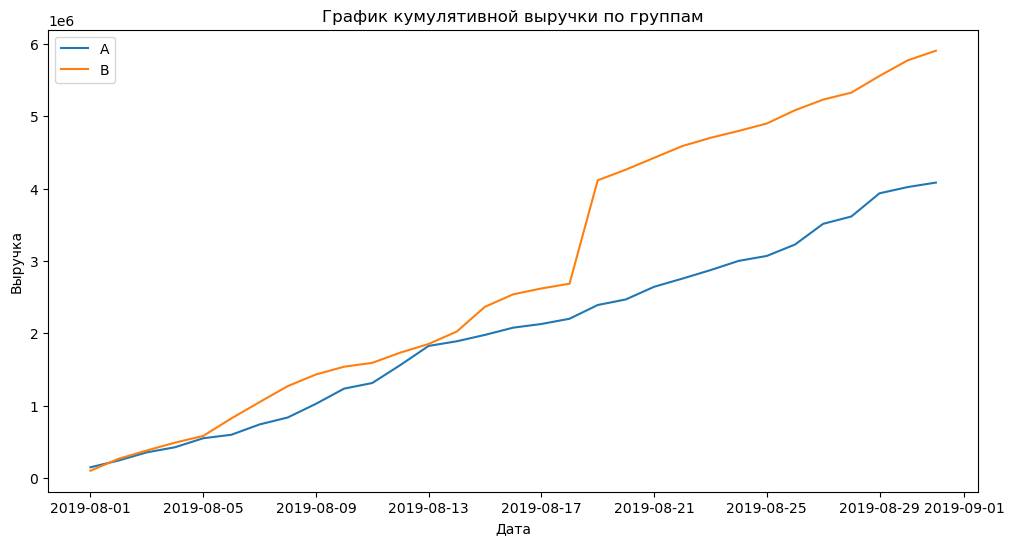

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам');

Выручка почти равномерно увеличивается в течение всего теста. При эттом график выручки группы B в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Построим график график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

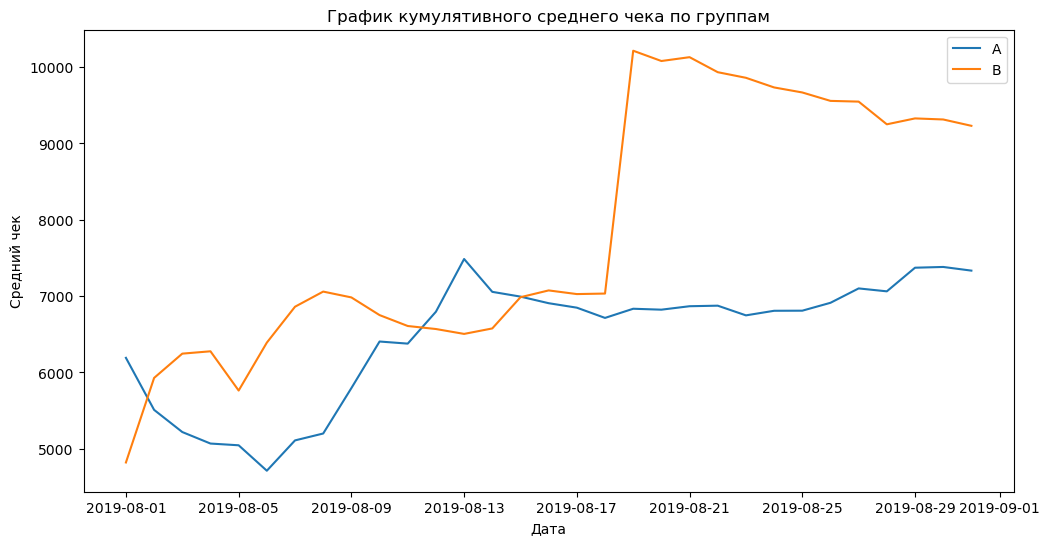

In [17]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам');

В середине теста (18-19 августа) сегмент B резко вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномальные значения влияют на результаты. При заключительном анализе их нужно удалить.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

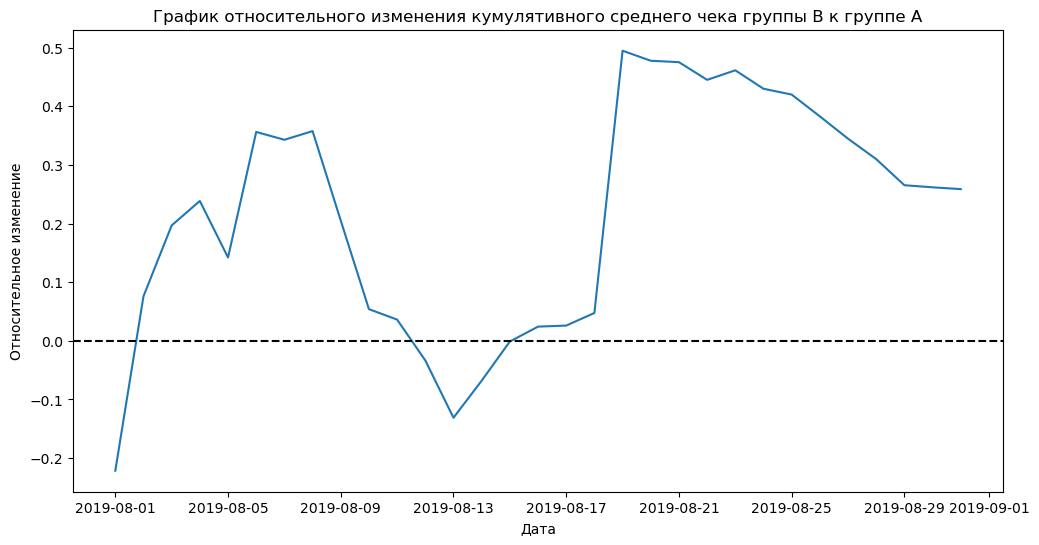

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом средний чек для группы B уменьшился и снова резко вырос, но теперь постепенно падает. Результаты теста значительно и резко менялись в несколько дат из-за аномальных заказов. Сделать из этого графика определённые выводы нельзя.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

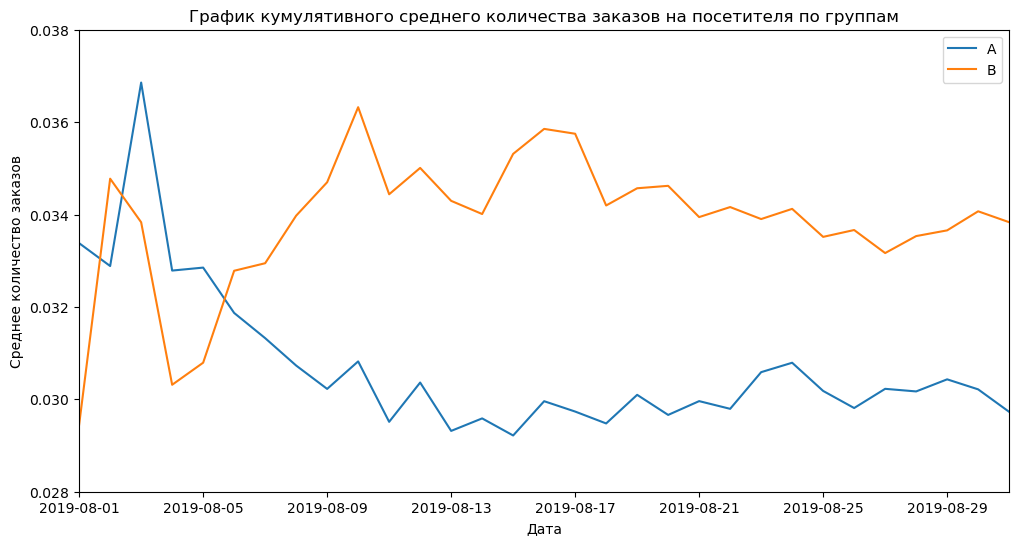

In [19]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.028, 0.038])
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');

У группы B среднее количество заказов на посетителя вырвалось вперёд и зафиксировалось, а у группы A — просело, но тоже зафиксировалось.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

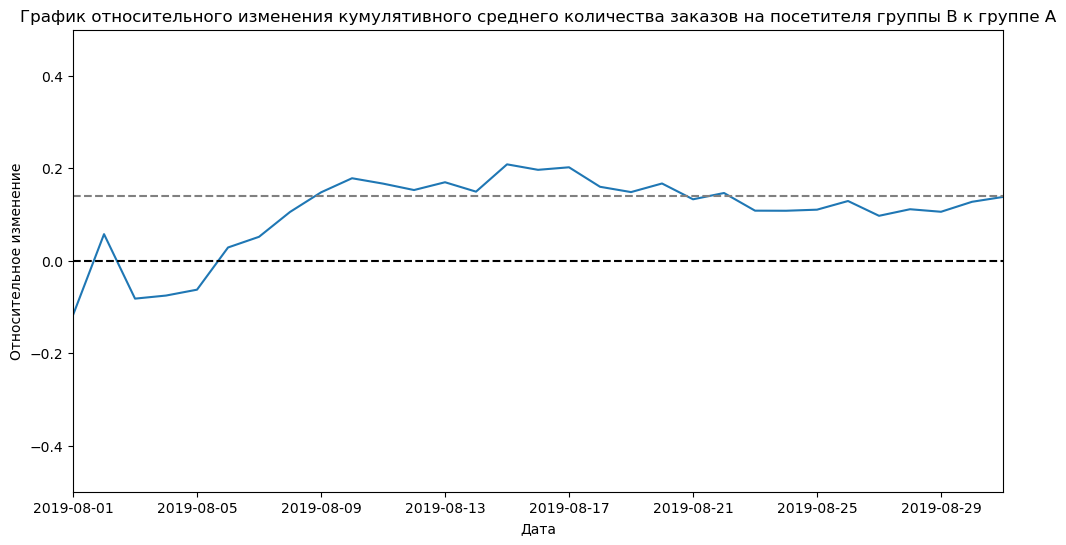

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');

График относительного изменения кумулятивного среднего количества заказов на посетителя показывает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около прироста в 14% относительно группы A.

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [21]:
ordersByVisitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitors.columns = ['visitorId', 'orders']

print(ordersByVisitors.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


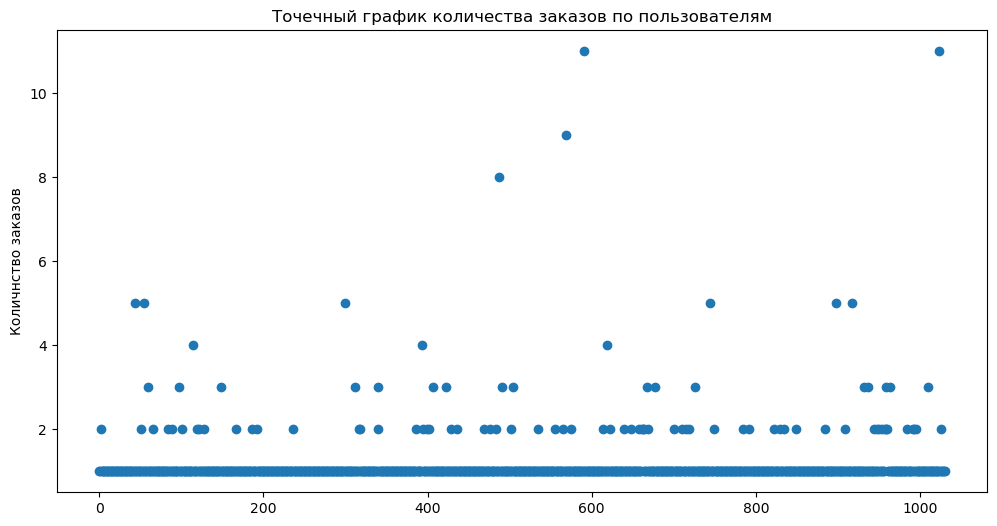

In [22]:
# серия из чисел от 0 до количества наблюдений в ordersByVisitors
x_values = pd.Series(range(0, len(ordersByVisitors)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByVisitors['orders'])
plt.ylabel('Количнство заказов')
plt.title('Точечный график количества заказов по пользователям');

Пользователей, заказавших более двух раз, мало. Они вполне могут быть аномальными.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
print(ordersByVisitors.sort_values(by='orders', ascending=False).head(10))  
print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByVisitors['orders'], [95, 99])) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
95-й и 99-й перцентили количества заказов на пользователя: [2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов. Примем за аномальных пользователей тех, кто совершил 3 заказа и более.

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [24]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


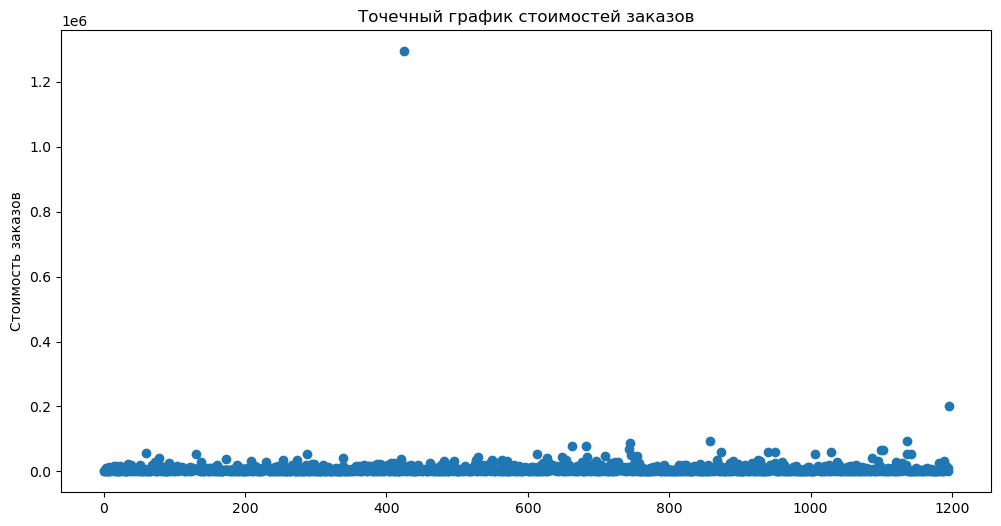

In [25]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимостей заказов');

Заказов стоимостью выше 100 000 рублей не очень много. Есть выбросы в районе 100 000 — 200 000 рублей. 
Заказ на 1,3 миллиона в интернет-магазине выглядит весьма аномально.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [26]:
print(orders.head(10))
print('95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [95, 99])) 

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
6      398296753  2900797465 2019-08-15     1860     B
7     2626614568    78758296 2019-08-15     1044     A
8     1576988021   295230930 2019-08-15    13710     A
9     1506739906  1882260405 2019-08-15     1855     B
95-й и 99-й перцентили стоимости заказов: [28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше, чем у 1% заказов — дороже 58 233 рублей. Примем за аномальных пользователей тех, кто совершил заказ на сумму свыше 28 000 рублей. 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Так как в данных есть большие (по сравнению с нормальным распределением) выбросы, которые могут повлиять на результат, для проверки гипотез воспользуемся критерием Манна-Уитни.  

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.  

Начнём с подготовки данных. 

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Посчитаем статистическую значимость различия в среднем количестве заказов на посетителя между группами.

In [28]:
ordersByVisitorsA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByVisitorsA.columns = ['visitorId', 'orders']

ordersByVisitorsB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByVisitorsB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByVisitorsA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByVisitorsB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value для сравнения средних чеков между группами:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value для сравнения средних чеков между группами: 0.017
Относительное различие в среднем между группами: 0.138


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя группы B к группе A равен 13.8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы.  
Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [29]:
print('P-value для сравнения средних чеков между группами:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value для сравнения средних чеков между группами: 0.729
Относительный прирост среднего чека группы B: 0.259


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительный прирост среднего чека группы B к группе A равен 26%.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Подготовим данные, очищенные от аномалий.  

95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Таким образом мы убрали до 5% пользователей с наибольшим числом заказов и до 5% заказов с наибольшей стоимостью.

In [30]:
visitorsWithManyOrders = pd.concat(
    [
        ordersByVisitorsA[ordersByVisitorsA['orders'] > np.percentile(ordersByVisitorsA['orders'], 95)]['visitorId'],
        ordersByVisitorsB[ordersByVisitorsB['orders'] > np.percentile(ordersByVisitorsB['orders'], 95)]['visitorId'],
    ],
    axis=0,
)
visitorsWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalVisitors = (
    pd.concat([visitorsWithManyOrders, visitorsWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalVisitors.head(5))
print(abnormalVisitors.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Всего 74 аномальных пользователя. Посчитаем относительные потери пользователей после фильтрации.

In [31]:
print('Общее количество уникальных пользователей в двух группах:', len(group_a)+len(group_b))
print('Количество аномальных пользователей:', abnormalVisitors.shape[0])
print('Относительные потери:', round(abnormalVisitors.shape[0]/(len(group_a)+len(group_b)),3))

Общее количество уникальных пользователей в двух группах: 1089
Количество аномальных пользователей: 74
Относительные потери: 0.068


Относительные потери составляют 6.8%.  
Подготовим выборки количества заказов по пользователям по группам теста.

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByVisitorsA[
            np.logical_not(ordersByVisitorsA['visitorId'].isin(abnormalVisitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByVisitorsB[
            np.logical_not(ordersByVisitorsB['visitorId'].isin(abnormalVisitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [33]:
print('P-value для сравнения среднего между очищенными группами:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего очищенной группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value для сравнения среднего между очищенными группами: 0.013
Относительный прирост среднего очищенной группы B: 0.173


Результаты по среднему количеству заказов не сильно изменились. Разница между сегментами выросла примерно на 3% и стала 17.3%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [34]:
print('P-value для сравнения средних чеков между очищенными группами:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalVisitors)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalVisitors)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalVisitors)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalVisitors)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value для сравнения средних чеков между очищенными группами: 0.738
Относительный прирост среднего чека очищенной группы B: -0.020


P-value немного увеличился. Статистически значимых отличий в среднем чеке между группами нет. Теперь относительный прирост среднего чека группы A к группе B равен 2%.

#### Примем решение по результатам теста и объясним его. Варианты решений:
      1. Остановить тест, зафиксировать победу одной из групп.
      2. Остановить тест, зафиксировать отсутствие различий между группами.
      3. Продолжить тест.

Имеющиеся факты:
- Есть статистически значимые различия по среднему количеству заказов на посетителя между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График относительного изменения кумулятивного среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около прироста в 14% относительно группы A;
- График различия среднего чека колеблется, сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить и признать победу группы B.

### Общий вывод

- Наиболее перспективная гипотеза по ICE – под номером 8: 'Запустить акцию, дающую скидку на товар в день рождения'.  
  Наиболее перспективная гипотеза по RICE – под номером 7: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.
- По результатам анализа A/B-теста, исходя из обнаруженных фактов, было принято решение о том, что тест следует остановить и признать победу группы B.